## Merge of data sources (aid data and financal data)

In [13]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

### Company 

In [14]:
KPIs = pd.read_csv('data/main/company_KPIs.csv')
KPIs = KPIs.loc[KPIs['year'] >= 2018]
KPIs.drop_duplicates(keep='first', inplace=True)

In [15]:
KPIs = KPIs.drop(columns = ['accruals', 'deferrals','inventories','fixed_assets'])

In [16]:
KPIs = KPIs.rename(columns={'qick_ratio' : 'quick_ratio', 
                                        'debt2equity_ratio' : 'debt/equity_ratio',
                                        'debt2asset_ratio' : 'debt/asset_ratio',
                                        })

In [17]:
KPIs['company'] = KPIs['company'].str.lower()
KPIs['name_matching'] = KPIs['name_matching'].str.lower()

In [18]:
KPIs.head(3)

,company,name_matching,period_start,period_end,assets,equity,liabilities,current_liabilities,current_assets,cash,current_ratio,quick_ratio,cash_ratio,debt/equity_ratio,debt/asset_ratio,equity_ratio,year
0,t.u.r. hotel am rothenbaum gmbh,t.u.r. hotel am rothenbaum gmbh,01.04.2020,31.03.2021,731671.83,472267.61,199582.31,10582.31,661589.35,163695.25,62.518425,62.518425,0.223728,0.422604,0.272776,0.645464,2021
1,t.u.r. hotel am rothenbaum gmbh,t.u.r. hotel am rothenbaum gmbh,01.04.2019,31.03.2020,512694.02,446790.84,25063.84,25063.84,425861.02,37486.08,16.991052,16.991052,0.073116,0.056097,0.048887,0.871457,2020
2,t.u.r. hotel am rothenbaum gmbh,t.u.r. hotel am rothenbaum gmbh,01.04.2018,31.03.2019,434079.56,393640.05,26543.09,26543.09,332652.56,13961.45,12.532548,12.526257,0.032163,0.067430,0.061148,0.906838,2019


Drop non fiscal year if different from calendar year

In [19]:
KPIs["cut_off"] = pd.to_datetime(KPIs["period_end"], infer_datetime_format=True).dt.month
KPIs = KPIs[KPIs["cut_off"]==12] # Fiscal year ending in december (like calendar year) (to ensure, that aid payment will be correctly matched with reporting periode)
KPIs.head(3)

,company,name_matching,period_start,period_end,assets,equity,liabilities,current_liabilities,current_assets,cash,current_ratio,quick_ratio,cash_ratio,debt/equity_ratio,debt/asset_ratio,equity_ratio,year,cut_off
4,gh grundinvest hessen gmbh,gh grundinvest hessen gmbh,01.01.2020,31.12.2020,2416778.57,192314.61,2013733.96,2013733.96,2372455.57,97459.91,1.178138,0.670834,0.040326,10.471040,0.833231,0.079575,2020,12
5,gh grundinvest hessen gmbh,gh grundinvest hessen gmbh,01.01.2019,31.12.2019,2157298.95,60730.99,1927967.96,1927967.96,2095163.40,6859.87,1.086721,0.567971,0.003180,31.746032,0.893695,0.028151,2019,12
6,gh grundinvest hessen gmbh,gh grundinvest hessen gmbh,01.01.2018,31.12.2018,1121777.06,0.00,1051340.31,1051340.31,1090643.56,2004.25,1.037384,1.037384,0.001787,inf,0.937210,0.000000,2018,12


Bring data into wide format. (1 row for every company)

In [20]:
KPIs_wide = KPIs
KPIs_wide = KPIs_wide.drop('name_matching', axis=1)
KPIs_wide = KPIs_wide.drop('cut_off', axis=1)
KPIs_wide = KPIs_wide.drop('period_start', axis=1)
KPIs_wide = KPIs_wide.drop('period_end', axis=1)
KPIs_wide =  KPIs_wide.pivot_table(index="company", columns="year", aggfunc='first')
KPIs_wide.columns = KPIs_wide.columns.map(lambda x: f'{x[0]}_{x[1]}')
KPIs_wide.reset_index()


,company,assets_2018,assets_2019,assets_2020,assets_2021,cash_2018,cash_2019,cash_2020,cash_2021,cash_ratio_2018,...,equity_ratio_2020,equity_ratio_2021,liabilities_2018,liabilities_2019,liabilities_2020,liabilities_2021,quick_ratio_2018,quick_ratio_2019,quick_ratio_2020,quick_ratio_2021
0,"""capillar gmbh""",2332299.34,NaN,2732777.71,NaN,36787.77,NaN,233693.31,NaN,0.015773,...,0.259127,NaN,1907952.22,NaN,1996968.98,NaN,0.561763,NaN,1.356299,NaN
1,"""cedon"" museumshops gmbh",3346436.46,2994454.78,2953545.57,3315576.89,340951.70,108592.96,356456.98,1094518.85,0.101885,...,0.331118,0.376323,1990886.76,1782900.01,1937804.31,2019107.59,0.529225,0.381719,1.507892,2.071978
2,"""der pommeraner"" loitz gmbh",5241088.11,NaN,NaN,NaN,25251.79,NaN,NaN,NaN,0.004818,...,NaN,NaN,4762714.82,NaN,NaN,NaN,0.481459,NaN,NaN,NaN
3,"""die rakete"" gastro gmbh",311863.65,389901.91,459210.13,NaN,35438.24,46393.64,74102.15,NaN,0.113634,...,0.036228,NaN,302658.12,281084.21,357494.81,NaN,0.770314,0.954699,4.643387,NaN
4,"""ecoma"" maschinen gmbh",1640573.82,1379945.74,1687367.43,3296575.74,5483.10,229.43,325.42,583.88,0.003342,...,0.000000,0.000000,1597409.70,1305483.28,1648004.43,3250637.74,0.527999,0.635738,0.231484,0.227806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500,überfluss hotelbetriebsgesellschaft mbh,441526.70,713805.80,1710810.39,NaN,41873.61,215332.33,222075.27,NaN,0.094838,...,0.000000,NaN,298772.15,660530.66,1512810.39,NaN,2.625156,2.951252,5.766044,NaN
23501,überland reisen berlin gmbh,NaN,370426.25,615684.63,NaN,NaN,258708.54,581672.91,NaN,NaN,...,0.486173,NaN,NaN,218803.66,184856.97,NaN,NaN,1.582294,3.298590,NaN
23502,überland tecklenburg gmbh,227316.84,NaN,NaN,562872.20,116063.87,NaN,NaN,505964.12,0.510582,...,NaN,0.559131,115957.68,NaN,NaN,27608.62,1.356447,NaN,NaN,19.481198
23503,überquell gmbh,2171411.66,1976323.34,1701928.23,NaN,91847.77,9972.35,1537.64,NaN,0.042299,...,0.000000,NaN,1775895.88,1692158.61,1458755.91,NaN,0.232738,0.090197,0.492466,NaN


### Aid Data

The column 'absorption_days' refers to the days between granting of the aid and the end of the fiscal year (balance sheet date)

In [21]:
aid_data = pd.read_csv('data/main/all_companies.csv')  
aid_data = aid_data[["Name des Beihilfeempfängers",
    "Art des Beihilfeempfängers","Tag der Gewährung", 
    "Wirtschaftszweig (NACE)", 
    "Beihilfeelement, in voller Höhe", 
    "Nominalbetrag" ,
    "Beihilfeinstrument"]]
aid_data["Jahr der Gewährung"] = pd.to_datetime(aid_data["Tag der Gewährung"], infer_datetime_format=True).dt.strftime('%Y').astype(int)
aid_data["Tag der Gewährung"] = pd.to_datetime(aid_data["Tag der Gewährung"], infer_datetime_format=True)
aid_data['absorption_days'] = (( aid_data["Tag der Gewährung"] + pd.offsets.YearEnd() ) - aid_data["Tag der Gewährung"] ).dt.days

aid_data['Name des Beihilfeempfängers'] = aid_data['Name des Beihilfeempfängers'].str.lower()
aid_data.head(3)

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_1475/3479997257.py:1: DtypeWarning: Columns (13,23) have mixed types. Specify dtype option on import or set low_memory=False.
  aid_data = pd.read_csv('data/main/all_companies.csv')


,Name des Beihilfeempfängers,Art des Beihilfeempfängers,Tag der Gewährung,Wirtschaftszweig (NACE),"Beihilfeelement, in voller Höhe",Nominalbetrag,Beihilfeinstrument,Jahr der Gewährung,absorption_days
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,2020-08-26,Herstellung von Druckerzeugnissen,126350.0,NaN,Sonstiges (bitte angeben),2020,127
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,2020-08-24,Kinos,150000.0,NaN,Sonstiges (bitte angeben),2020,129
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,2020-08-14,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,Sonstiges (bitte angeben),2020,139


Replace wrong company names (wiht the correct names that were collected from the register of commerce during scraping)

In [22]:
aid_data = aid_data.merge(KPIs[['name_matching', 'company']], 
                how='left', 
                left_on='Name des Beihilfeempfängers', 
                right_on='name_matching')

aid_data['Name des Beihilfeempfängers'] = np.where(aid_data['company'].isna() , aid_data['Name des Beihilfeempfängers'], aid_data['company'])

aid_data = aid_data.drop(columns = ['name_matching', 'company', 'Tag der Gewährung'])
aid_data.drop_duplicates(keep='first', inplace=True)
aid_data.head(3)

,Name des Beihilfeempfängers,Art des Beihilfeempfängers,Wirtschaftszweig (NACE),"Beihilfeelement, in voller Höhe",Nominalbetrag,Beihilfeinstrument,Jahr der Gewährung,absorption_days
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,Herstellung von Druckerzeugnissen,126350.0,NaN,Sonstiges (bitte angeben),2020,127
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,Kinos,150000.0,NaN,Sonstiges (bitte angeben),2020,129
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,Sonstiges (bitte angeben),2020,139


Rename columns

In [23]:
aid_data = aid_data.rename(columns={'Name des Beihilfeempfängers' : 'company', 
                                        'Art des Beihilfeempfängers' : 'size',
                                        'Jahr der Gewährung' : 'year',
                                        'Wirtschaftszweig (NACE)' : 'industry',
                                        'Beihilfeelement, in voller Höhe' : 'amount',
                                        'Nominalbetrag' : 'amount_nom',
                                        'Beihilfeinstrument' : 'instrument',
                                        })
aid_data.head(3)

,company,size,industry,amount,amount_nom,instrument,year,absorption_days
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,Herstellung von Druckerzeugnissen,126350.0,NaN,Sonstiges (bitte angeben),2020,127
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,Kinos,150000.0,NaN,Sonstiges (bitte angeben),2020,129
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,Sonstiges (bitte angeben),2020,139


functions to convert the detect the industry of the company and return the NACE industry  in level 1 and 2

In [24]:
def search_nace(code):
    code_list = pd.read_csv('WZ_2008-DE-2023-04-11-Gliederung.csv',encoding='utf-8-sig', delimiter=';')
    code_list = code_list.iloc[8:]
    code_list = code_list[code_list["Unnamed: 1"] != '1']

    try:
        result_lv1 = code_list[code_list["Unnamed: 2"] == code].iloc[:1,0].values[0]
        return result_lv1
    except:
        return code

Apply function to get new dataframe with NACE industry.

In [25]:
company_info = aid_data.pivot_table(index="company", values=['size','industry'] , aggfunc='first').reset_index()
company_info['industry'] = company_info['industry'].apply(search_nace)
#company_info['industry_2'] = company_info['industry'].apply(search_nace_lv2)

In [26]:
company_info


,company,industry,size
0,"""aux pieds de la tour eiffel""",47.71,Kleine und mittlere Unternehmen
1,"""bedes"" nutzfahrzeug-reparatur",52.29,nur Großunternehmen
2,"""biwakschachtel"" bergsporthand",47.64,Kleine und mittlere Unternehmen
3,"""brauhaus stephanus"" stephan u",55.1,nur Großunternehmen
4,"""buch-express"" transport gmbh",49.4,nur Großunternehmen
...,...,...,...
103850,„dinghartinger apfelstrudel“ produktions- und ...,10.71,Kleine und mittlere Unternehmen
103851,�berland reisen berlin gmbh,79.12,Kleine und mittlere Unternehmen
103852,�bermorgen getr�nke- trendprodukte vertriebsge...,46.39,Kleine und mittlere Unternehmen
103853,�volution synerg�tique gmbh,29.31,nur Großunternehmen


In [27]:
company_info['industry'] = company_info['industry'].astype(str).str[:2]

In [28]:
company_info.head(3)

,company,industry,size
0,"""aux pieds de la tour eiffel""",47,Kleine und mittlere Unternehmen
1,"""bedes"" nutzfahrzeug-reparatur",52,nur Großunternehmen
2,"""biwakschachtel"" bergsporthand",47,Kleine und mittlere Unternehmen


Assign different aid instruments into the categories grant and loan. Some rarly used instruments for very large companies are dropped

In [29]:
aid_data['instrument'] = np.where(aid_data['instrument'] == 'Sonstiges (bitte angeben)', 'loan', aid_data['instrument']) # categorize as loan (Sonstiges refers to KFW Loads according to research)
aid_data['instrument'] = np.where(aid_data['instrument'] == 'Zinsgünstiges Darlehen', 'loan', aid_data['instrument']) # categorize as loan
aid_data['instrument'] = np.where(aid_data['instrument'] == 'Zinszuschuss', 'loan', aid_data['instrument'])# categorize as loan
aid_data['instrument'] = np.where(aid_data['instrument'] == 'Zuschuss', 'grant', aid_data['instrument']) 

aid_data = aid_data[aid_data['instrument'] != 'Andere Formen der Kapitalintervention'] # remove
aid_data = aid_data[aid_data['instrument'] != 'Bürgschaft'] # remove
aid_data = aid_data[aid_data['instrument'] != 'Eigenkapitalinstrumente'] # remove
aid_data = aid_data[aid_data['instrument'] != 'Kredite/rückzahlbare Vorschüsse'] # remove

aid_data.head(3)

,company,size,industry,amount,amount_nom,instrument,year,absorption_days
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,Herstellung von Druckerzeugnissen,126350.0,NaN,loan,2020,127
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,Kinos,150000.0,NaN,loan,2020,129
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,loan,2020,139


Combine the seperate columns for amount of the grants and loans into a single column

In [30]:
aid_data['amount'].replace(np.nan, 0, inplace=True)
aid_data['amount_nom'].replace(np.nan, 0, inplace=True)

aid_data['aid'] = np.where(aid_data['amount_nom'] == 0, aid_data['amount'], aid_data['amount_nom'])
aid_data = aid_data.drop(columns = ['amount_nom', 'amount'])
aid_data.head(3)

,company,size,industry,instrument,year,absorption_days,aid
0,eurocaribe druck und verlag gnbh,Kleine und mittlere Unternehmen,Herstellung von Druckerzeugnissen,loan,2020,127,126350.0
1,k-motion gmbh & co. kg,Kleine und mittlere Unternehmen,Kinos,loan,2020,129,150000.0
2,künstlermanagement uwe kanthak,Kleine und mittlere Unternehmen,"Kreative, künstlerische und unterhaltende Täti...",loan,2020,139,141904.0


The absorption days are aggregated with a weighted sum based on the aid amount. This in neccessary since some companies received two or more aid payments throughout a year. 

In [31]:
def my_agg(x):
    names = {'days': (x['aid'] * x['absorption_days']).sum()/x['aid'].sum()}
    return pd.Series(names, index=['days'])

df_absorption_days = aid_data.groupby(['company', 'year','instrument']).apply(my_agg)

df_absorption_days = df_absorption_days.reset_index()

df_absorption_days.head(3)

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_1475/978256677.py:2: RuntimeWarning: invalid value encountered in scalar divide
  names = {'days': (x['aid'] * x['absorption_days']).sum()/x['aid'].sum()}


,company,year,instrument,days
0,"""aux pieds de la tour eiffel""",2020,loan,212.0
1,"""bedes"" nutzfahrzeug-reparatur",2020,loan,169.0
2,"""biwakschachtel"" bergsporthand",2020,loan,29.0


Drop 'industry' and 'size' before aggregation. They will be merged back later. (Needed because some companies have inconsitent industry and size data)

In [32]:
aid_dat_agg = aid_data.drop(columns = ['industry', 'size'])
aid_dat_agg = aid_dat_agg.groupby(['company', 'year','instrument']).sum().reset_index()
aid_dat_agg.head(3)

,company,year,instrument,absorption_days,aid
0,"""aux pieds de la tour eiffel""",2020,loan,212,100000.0
1,"""bedes"" nutzfahrzeug-reparatur",2020,loan,169,300000.0
2,"""biwakschachtel"" bergsporthand",2020,loan,29,200000.0


Merge (left join) with the df_absorption_days 

In [33]:
aid_dat_agg_absorption_days = aid_dat_agg.merge(df_absorption_days,how='left',left_on=['company','year','instrument'],right_on=['company','year','instrument'])
aid_dat_agg_absorption_days.head(3)

,company,year,instrument,absorption_days,aid,days
0,"""aux pieds de la tour eiffel""",2020,loan,212,100000.0,212.0
1,"""bedes"" nutzfahrzeug-reparatur",2020,loan,169,300000.0,169.0
2,"""biwakschachtel"" bergsporthand",2020,loan,29,200000.0,29.0


Bring aggregated data into a wide format

In [34]:
aid_dat_agg_absorption_days = aid_dat_agg_absorption_days.pivot_table(index=['company'], columns=['instrument','year'])[['aid','days']].reset_index()
aid_dat_agg_absorption_days.head(3)

company   aid                           \
instrument                                 grant                     loan   
year                                        2020 2021 2022 2023      2020   
0            "aux pieds de la tour eiffel"   NaN  NaN  NaN  NaN  100000.0   
1           "bedes" nutzfahrzeug-reparatur   NaN  NaN  NaN  NaN  300000.0   
2           "biwakschachtel" bergsporthand   NaN  NaN  NaN  NaN  200000.0   

                      days                                  
instrument           grant                  loan            
year       2021 2022  2020 2021 2022 2023   2020 2021 2022  
0           NaN  NaN   NaN  NaN  NaN  NaN  212.0  NaN  NaN  
1           NaN  NaN   NaN  NaN  NaN  NaN  169.0  NaN  NaN  
2           NaN  NaN   NaN  NaN  NaN  NaN   29.0  NaN  NaN

Convert multi level index into single index

In [35]:
aid_dat_agg_absorption_days.columns = aid_dat_agg_absorption_days.columns.map(lambda x: f'{x[0]}_{x[1]}_{x[2]}')
aid_dat_agg_absorption_days = aid_dat_agg_absorption_days.reset_index()
aid_dat_agg_absorption_days.rename(columns={"company__": "company"}, inplace=True)
aid_dat_agg_absorption_days.head(3)

,index,company,aid_grant_2020,aid_grant_2021,aid_grant_2022,aid_grant_2023,aid_loan_2020,aid_loan_2021,aid_loan_2022,days_grant_2020,days_grant_2021,days_grant_2022,days_grant_2023,days_loan_2020,days_loan_2021,days_loan_2022
0,0,"""aux pieds de la tour eiffel""",NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,212.0,NaN,NaN
1,1,"""bedes"" nutzfahrzeug-reparatur",NaN,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,NaN
2,2,"""biwakschachtel"" bergsporthand",NaN,NaN,NaN,NaN,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN


Merge (left join) the company_info df with industry info ans size

In [36]:
aid_dat_agg_absorption_days = aid_dat_agg_absorption_days.merge(company_info,how='left',left_on='company',right_on='company') #Adding company information (size and industry)
aid_dat_agg_absorption_days.head(3)

,index,company,aid_grant_2020,aid_grant_2021,aid_grant_2022,aid_grant_2023,aid_loan_2020,aid_loan_2021,aid_loan_2022,days_grant_2020,days_grant_2021,days_grant_2022,days_grant_2023,days_loan_2020,days_loan_2021,days_loan_2022,industry,size
0,0,"""aux pieds de la tour eiffel""",NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,212.0,NaN,NaN,47,Kleine und mittlere Unternehmen
1,1,"""bedes"" nutzfahrzeug-reparatur",NaN,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,169.0,NaN,NaN,52,nur Großunternehmen
2,2,"""biwakschachtel"" bergsporthand",NaN,NaN,NaN,NaN,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,47,Kleine und mittlere Unternehmen


In [37]:
#aid_dat_agg_absorption_days.to_csv('data/main/aid_dataset.csv', encoding='utf-8', index=False)

### Merge

merge the dataframes of company info and aid info

In [38]:
merged_df = KPIs_wide.merge(aid_dat_agg_absorption_days, 
                how='left', 
                left_on='company', 
                right_on='company')

In [ ]:
merged_df.head(3)

In [41]:
merged_df.to_csv('data/main/data_set.csv', encoding='utf-8', index=False)

### Data exploration

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Size of companies (Distribution)

In [5]:
merged_df = pd.read_csv('data/main/data_set.csv')
merged_df.columns = merged_df.columns.str.split("_",expand=True)
merged_df.set_index('company', inplace=True)

In [6]:
df_assets = merged_df.assets.droplevel(1, axis=1)

The distribution on companies is similar

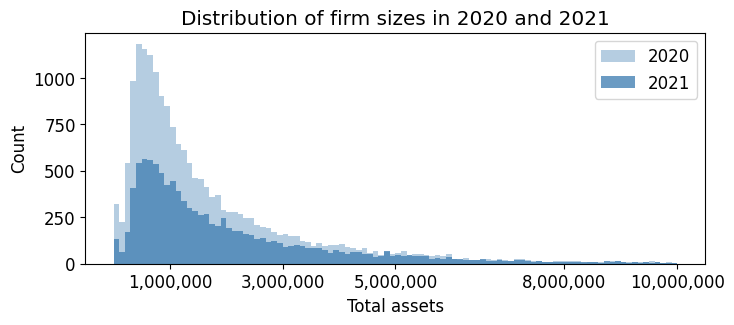

In [46]:
plt.figure(figsize=(8,3))
plt.rcParams['font.size'] = 12
#plt.hist(df_assets['2018'], bins=50, alpha=1, label="2018", range=(0,5000000),  lw=2, histtype='step')
#plt.hist(df_assets['2019'], bins=50, alpha=1, label="2019", range=(0,5000000),  lw=2, histtype='step')
plt.hist(df_assets['2020'], bins=100, alpha=.4, label="2020", range=(0,10000000),color='steelblue',  lw=2, histtype='stepfilled')
plt.hist(df_assets['2021'], bins=100, alpha=.8, label="2021", range=(0,10000000),color='steelblue',  lw=2, histtype='stepfilled')
plt.xlabel("Total assets")
plt.ylabel("Count")
plt.title("Distribution of firm sizes in 2020 and 2021")
plt.legend(loc='upper right')

plt.xticks([1000000,3000000, 5000000, 8000000,10000000])
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig("paper/Figures/FirmSizes.png")

plt.show()

#### Ratios

In [489]:
merged_df = pd.read_csv('data/main/data_set.csv')
merged_df.columns = merged_df.columns.str.split("_",expand=True)
merged_df.set_index('company', inplace=True)

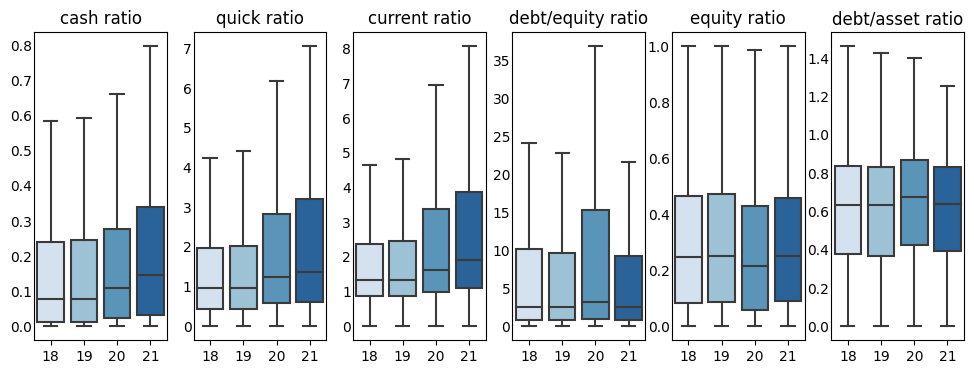

In [547]:
ratios = merged_df.swaplevel(0,1, axis=1)['ratio']
ratios[ratios < 0] = np.nan
ratios = ratios.reindex(columns=['cash', 'quick', 'current', 'debt/equity', 'equity','debt/asset'], level=0)
fig, axes = plt.subplots(1, 6, figsize=(12,4))
i = 0
for idx, data in ratios.groupby(level=0, axis=1,sort=False):

   data2 = data.reset_index()
   sns.boxplot(ax=axes[i], data=data2,showfliers=False,palette="Blues").set(title=f"{idx+' ratio'}")
   axes[i].set_xticks([0, 1, 2, 3], ["18", "19", "20", "21"])
   axes[i].tick_params(axis='y',pad=-2,left = False)
   i += 1
plt.show()
fig.savefig("paper/Figures/chart_ratios.png") 

In [412]:
merged_df = pd.read_csv('data/main/data_set.csv')

In [413]:
ratios_sectors = merged_df[['industry_2','cash_ratio_2018','cash_ratio_2019','cash_ratio_2020','cash_ratio_2021']]
ratios_sectors = ratios_sectors.rename(columns={'cash_ratio_2018' : '2018', 
                                        'cash_ratio_2019' : '2019',
                                        'cash_ratio_2020' : '2020',
                                        'cash_ratio_2021' : '2021',
                                        })

In [414]:
ratios_sectors.groupby(by='industry_2', sort=False).count().head(6)

,2018,2019,2020,2021
industry_2,,,,
Einzelhandel (ohne Handel mit Kraftfahrzeugen),1215,1380,1499,882
Herstellung von Nahrungs- und Futtermitteln,162,191,193,124
Gastronomie,1705,1999,2117,913
Maschinenbau,472,525,552,414
"Erbringung von Dienstleistungen des Sports, der Unterhaltung und der Erholung",585,679,705,378
Beherbergung,1111,1273,1341,701


In [415]:
ratios_sectors = ratios_sectors[(ratios_sectors['industry_2'] == 'Einzelhandel (ohne Handel mit Kraftfahrzeugen)')|
                                (ratios_sectors['industry_2'] == 'Herstellung von Nahrungs- und Futtermitteln')|
                                (ratios_sectors['industry_2'] == 'Gastronomie')|
                                (ratios_sectors['industry_2'] == 'Maschinenbau')|
                                (ratios_sectors['industry_2'] == 'Erbringung von Dienstleistungen des Sports, der Unterhaltung und der Erholung')|
                                (ratios_sectors['industry_2'] == 'Beherbergung')]

Beherbergung                                                                          Axes(0.1,0.679412;0.363636x0.220588)
Einzelhandel (ohne Handel mit Kraftfahrzeugen)                                   Axes(0.536364,0.679412;0.363636x0.220588)
Erbringung von Dienstleistungen des Sports, der Unterhaltung und der Erholung         Axes(0.1,0.414706;0.363636x0.220588)
Gastronomie                                                                      Axes(0.536364,0.414706;0.363636x0.220588)
Herstellung von Nahrungs- und Futtermitteln                                               Axes(0.1,0.15;0.363636x0.220588)
Maschinenbau                                                                         Axes(0.536364,0.15;0.363636x0.220588)
dtype: object

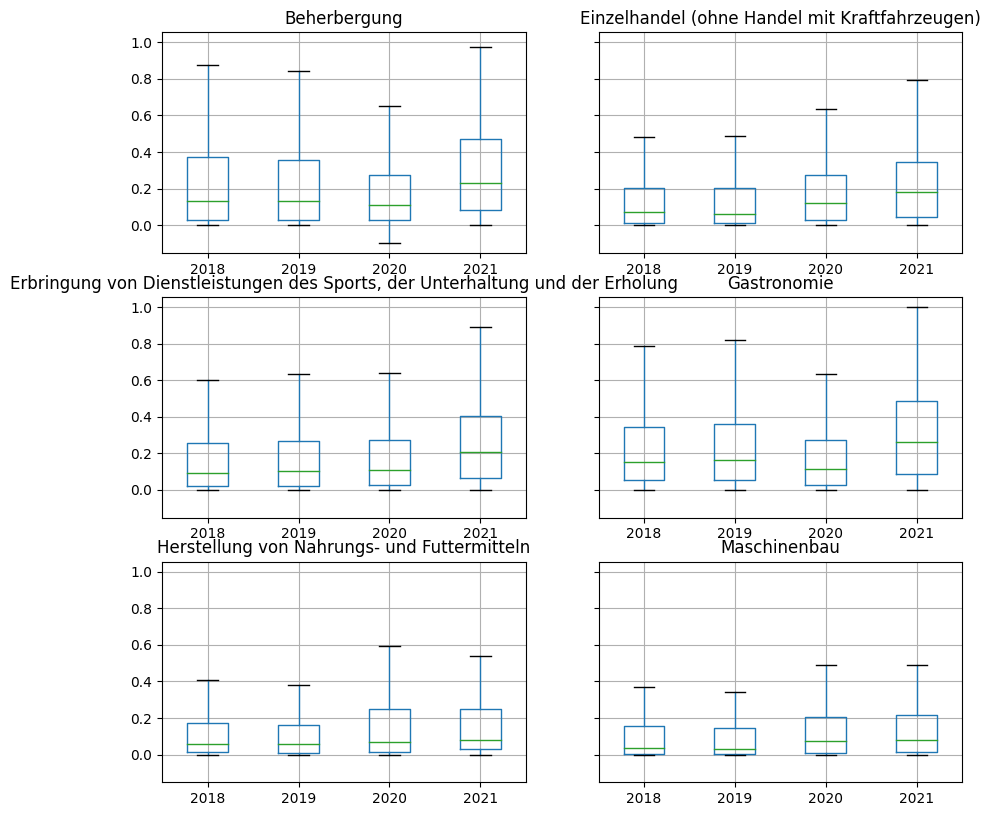

In [416]:
ratios_sectors.groupby('industry_2').boxplot(subplots=True,showfliers=False,figsize=(10,10),fontsize=10)

In [417]:
ratios_sectors

,industry_2,2018,2019,2020,2021
0,Einzelhandel (ohne Handel mit Kraftfahrzeugen),0.015773,NaN,0.085515,NaN
1,Einzelhandel (ohne Handel mit Kraftfahrzeugen),0.101885,0.036265,0.120688,0.330114
2,Herstellung von Nahrungs- und Futtermitteln,0.004818,NaN,NaN,NaN
3,Gastronomie,0.113634,0.118988,0.161369,NaN
4,Maschinenbau,0.003342,0.000166,0.000193,0.000177
...,...,...,...,...,...
23498,Herstellung von Nahrungs- und Futtermitteln,0.021006,0.010681,0.002331,0.004273
23499,Gastronomie,0.041930,0.119485,0.071881,NaN
23500,Beherbergung,0.094838,0.301668,0.129807,NaN
23503,Gastronomie,0.042299,0.005046,0.000903,NaN


<Axes: xlabel='industry_2', ylabel='2019'>

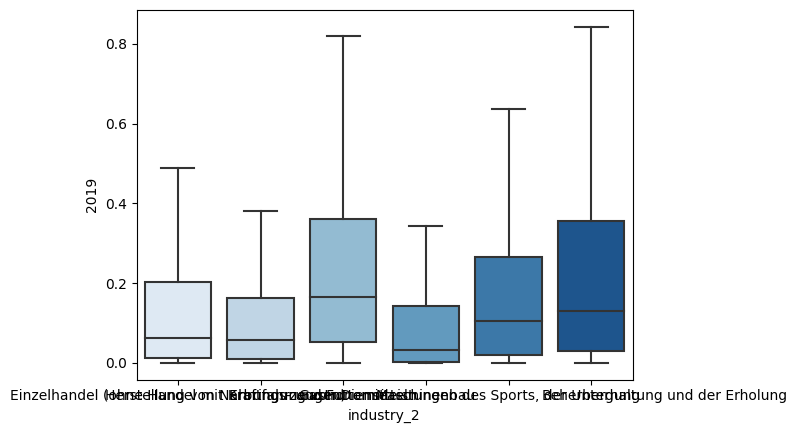

In [433]:
sns.boxplot(y = ratios_sectors["2020"], x=ratios_sectors["industry_2"],showfliers=False,palette="Blues")

<Axes: xlabel='industry_2', ylabel='2020'>

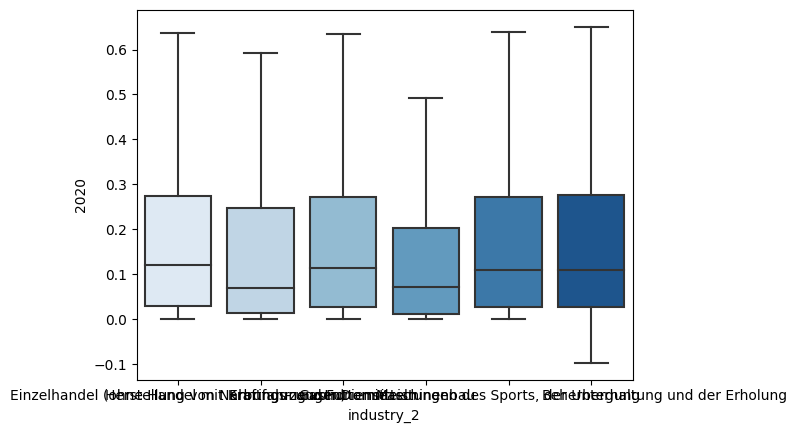

In [434]:
sns.boxplot(y = ratios_sectors["2020"], x=ratios_sectors["industry_2"],showfliers=False,palette="Blues")

In [ ]:
sns.boxplot(x=["2018","2019","2020","2021"],
            hue="industry_2", palette=["m", "g"],
            data=ratios_sectors)
sns.despine(offset=10, trim=True)



#### Aid

In [337]:
merged_df = pd.read_csv('data/main/data_set.csv')

In [340]:
merged_df.head(3)

,company,assets_2018,assets_2019,assets_2020,assets_2021,cash_2018,cash_2019,cash_2020,cash_2021,cash_ratio_2018,...,days_grant_2020,days_grant_2021,days_grant_2022,days_grant_2023,days_loan_2020,days_loan_2021,days_loan_2022,size,industry_1,industry_2
0,"""capillar gmbh""",2332299.34,NaN,2732777.71,NaN,36787.77,NaN,233693.31,NaN,0.015773,...,NaN,NaN,NaN,NaN,231.0,NaN,NaN,Kleine und mittlere Unternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
1,"""cedon"" museumshops gmbh",3346436.46,2994454.78,2953545.57,3315576.89,340951.70,108592.96,356456.98,1094518.85,0.101885,...,NaN,NaN,NaN,NaN,240.0,NaN,NaN,nur Großunternehmen,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen)
2,"""der pommeraner"" loitz gmbh",5241088.11,NaN,NaN,NaN,25251.79,NaN,NaN,NaN,0.004818,...,NaN,NaN,NaN,NaN,225.0,NaN,276.0,nur Großunternehmen,Verarbeitendes Gewerbe,Herstellung von Nahrungs- und Futtermitteln


In [342]:
pd.pivot_table(merged_df, values=['aid_grant_2020','aid_grant_2021','aid_grant_2022'], 
                                index=['industry_2'], 
                                #columns=['num-of-doors'], 
                                aggfunc=['count'],
                                fill_value=0)['count'].sort_values(by=['aid_grant_2021'], ascending=False).head(8)

,aid_grant_2020,aid_grant_2021,aid_grant_2022
industry_2,,,
Gastronomie,190,2149,515
Beherbergung,309,1352,513
Einzelhandel (ohne Handel mit Kraftfahrzeugen),39,891,214
"Erbringung von Dienstleistungen des Sports, der Unterhaltung und der Erholung",43,733,168
Großhandel (ohne Handel mit Kraftfahrzeugen),22,535,125
Erbringung von wirtschaftlichen Dienstleistungen für Unternehmen und Privatpersonen a. n. g.,87,459,200
"Reisebüros, Reiseveranstalter und Erbringung sonstiger Reservierungsdienstleistungen",270,453,249
"Spiel-, Wett- und Lotteriewesen",7,361,60


In [ ]:
merged_df[['aid','size']].reset_index().reset_index()[['aid','size']].pivot_table(index='size',values='aid',aggfunc='sum')

In [ ]:
pd.pivot_table(merged_df, values=['grant_2020','grant_2021','grant_2022'], 
                                index=['size'], 
                                #columns=['num-of-doors'], 
                                aggfunc=['count'],
                                fill_value=0)

count                      
                                grant_2020 grant_2021 grant_2022
size                                                            
Kleine und mittlere Unternehmen       1449      10238       3224
nur Großunternehmen                     27        353        170

In [ ]:
pd.pivot_table(merged_df, values=['grant_2020','grant_2021','grant_2022'], 
                                index=['industry_2'], 
                                #columns=['num-of-doors'], 
                                aggfunc=['count'],
                                fill_value=0)['count'].sort_values(by=['grant_2021'], ascending=False).head(15)

,grant_2020,grant_2021,grant_2022
industry_2,,,
Gastronomie,190,2149,515
Beherbergung,309,1352,513
Einzelhandel (ohne Handel mit Kraftfahrzeugen),39,891,214
"Erbringung von Dienstleistungen des Sports, der Unterhaltung und der Erholung",43,733,168
Großhandel (ohne Handel mit Kraftfahrzeugen),22,535,125
Erbringung von wirtschaftlichen Dienstleistungen für Unternehmen und Privatpersonen a. n. g.,87,459,200
"Reisebüros, Reiseveranstalter und Erbringung sonstiger Reservierungsdienstleistungen",270,453,249
"Spiel-, Wett- und Lotteriewesen",7,361,60
Erbringung von sonstigen überwiegend persönlichen Dienstleistungen,41,287,90


In [ ]:
pd.pivot_table(merged_df, values=['loan_2020','loan_2021','loan_2022'], 
                                index=['industry_1'], 
                                #columns=['num-of-doors'], 
                                aggfunc=['count'],
                                fill_value=0)['count'].sort_values(by=['loan_2021'], ascending=False)

,loan_2020,loan_2021,loan_2022
industry_1,,,
Handel; Instandhaltung und Reparatur von Kraftfahrzeugen,1932,898,320
Verarbeitendes Gewerbe,2263,829,325
Baugewerbe,907,475,170
Erbringung von sonstigen wirtschaftlichen Dienstleistungen,894,269,78
Information und Kommunikation,657,238,68
Verkehr und Lagerei,629,224,82
"Erbringung von freiberuflichen, wissenschaftlichen und technischen Dienstleistungen",603,173,53
Gastgewerbe,1060,126,50
Großhandel (ohne Handel mit Kraftfahrzeugen und Krafträdern),84,89,24
